In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [87]:
data1=yf.download("^NSEI",start="2011-01-01",end="2024-01-01",interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [88]:
data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6177.450195,6181.049805,5883.600098,5904.600098,5904.600098,0
2011-01-10,5901.299805,5907.250000,5639.649902,5654.549805,5654.549805,0
2011-01-17,5648.799805,5747.649902,5624.149902,5696.500000,5696.500000,0
2011-01-24,5717.100098,5801.549805,5459.549805,5512.149902,5512.149902,0
2011-01-31,5452.549805,5556.299805,5369.049805,5395.750000,5395.750000,0
...,...,...,...,...,...,...
2023-11-27,19844.650391,20291.550781,19800.000000,20267.900391,20267.900391,1218200
2023-12-04,20601.949219,21006.099609,20507.750000,20969.400391,20969.400391,1728700
2023-12-11,20965.300781,21492.300781,20769.500000,21456.650391,21456.650391,1561300


In [89]:
data1["Risk"]=(0.5*(data1["Open"]**2+data1["Close"]**2)-(0.5*(data1["Open"]+data1["Close"]))**2)**0.5

In [64]:
data1.head()

,Open,High,Low,Close,Adj Close,Volume,return,Risk
Date,,,,,,,,
2011-01-01,6177.450195,6181.049805,5416.649902,5505.899902,5505.899902,0,NaN,335.775146
2011-02-01,5537.299805,5599.250000,5177.700195,5333.250000,5333.250000,0,-0.031357,102.024902
2011-03-01,5382.000000,5872.000000,5348.200195,5833.750000,5833.750000,0,0.093845,225.875000
2011-04-01,5835.000000,5944.450195,5693.250000,5749.500000,5749.500000,0,-0.014442,42.750000
2011-05-01,5766.899902,5775.250000,5328.700195,5473.100098,5473.100098,0,-0.048074,146.899902


In [90]:
data1["return"]=data1["Adj Close"].pct_change()
data1.dropna()

,Open,High,Low,Close,Adj Close,Volume,Risk,return
Date,,,,,,,,
2011-01-10,5901.299805,5907.250000,5639.649902,5654.549805,5654.549805,0,123.375000,-0.042348
2011-01-17,5648.799805,5747.649902,5624.149902,5696.500000,5696.500000,0,23.850098,0.007419
2011-01-24,5717.100098,5801.549805,5459.549805,5512.149902,5512.149902,0,102.475098,-0.032362
2011-01-31,5452.549805,5556.299805,5369.049805,5395.750000,5395.750000,0,28.399902,-0.021117
2011-02-07,5430.149902,5440.350098,5177.700195,5310.000000,5310.000000,0,60.074951,-0.015892
...,...,...,...,...,...,...,...,...
2023-11-27,19844.650391,20291.550781,19800.000000,20267.900391,20267.900391,1218200,211.625000,0.023905
2023-12-04,20601.949219,21006.099609,20507.750000,20969.400391,20969.400391,1728700,183.725586,0.034611
2023-12-11,20965.300781,21492.300781,20769.500000,21456.650391,21456.650391,1561300,245.674805,0.023236


In [91]:
Em=np.mean(data1["return"])
Vm=np.var(data1["return"])
rf=0.05/(12*4)  #---------- to make it monthly
gamma_m=(Em-rf)/Vm**0.5
gamma_m

0.05028929452866728

In [112]:
rf


0.0010416666666666667

#-------line is   E=rf+gamma_m*sigma
plt.axline([0,rf],slope=gamma_m)
plt.xlim([0.05,0.08])
plt.ylim([0.003,0.01])
plt.xlabel("risk")
plt.ylabel("return")
plt.title("Capital Asset Line")
plt.show()

In [94]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
# Step 2: Prepare the dataset
# Select the 'Adj Close' column for price prediction
data = data1['Adj Close'].values
data = data.reshape(-1, 1)

# Step 3: Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create training and test sets
train_size = int(len(scaled_data) * 0.8)
train_datax = scaled_data[:train_size]
train_datay=scaler.fit_transform(data1["Risk"].values.reshape(-1,1))[:train_size]
test_datax = scaled_data[train_size:]
test_datay=scaler.fit_transform(data1["Risk"].values.reshape(-1,1))[train_size:]


lookback = 20  # Lookback of 60 days
X_train, y_train =train_datax,train_datay
X_test, y_test = test_datax,test_datay



# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [95]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # Take only the last time step
        return out

# Step 6: Set device, hyperparameters, and initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMModel(input_size=1, hidden_size=50, num_layers=2, output_size=1).to(device)

# Step 7: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 8: Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)


In [96]:

# Step 9: Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 10: Evaluate the model
model.eval()
train_predictions = model(X_train_tensor).detach().cpu().numpy()
test_predictions = model(X_test_tensor).detach().cpu().numpy()

# Step 11: Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))



C:\Users\Prithwiswar\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([542, 1])) that is different to the input size (torch.Size([542])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0133
Epoch [20/100], Loss: 0.0134
Epoch [30/100], Loss: 0.0133
Epoch [40/100], Loss: 0.0133
Epoch [50/100], Loss: 0.0133
Epoch [60/100], Loss: 0.0133
Epoch [70/100], Loss: 0.0133
Epoch [80/100], Loss: 0.0133
Epoch [90/100], Loss: 0.0133
Epoch [100/100], Loss: 0.0133


In [101]:
len(y_train_actual)
len(X_train)
X_test.shape

(136, 1, 1)

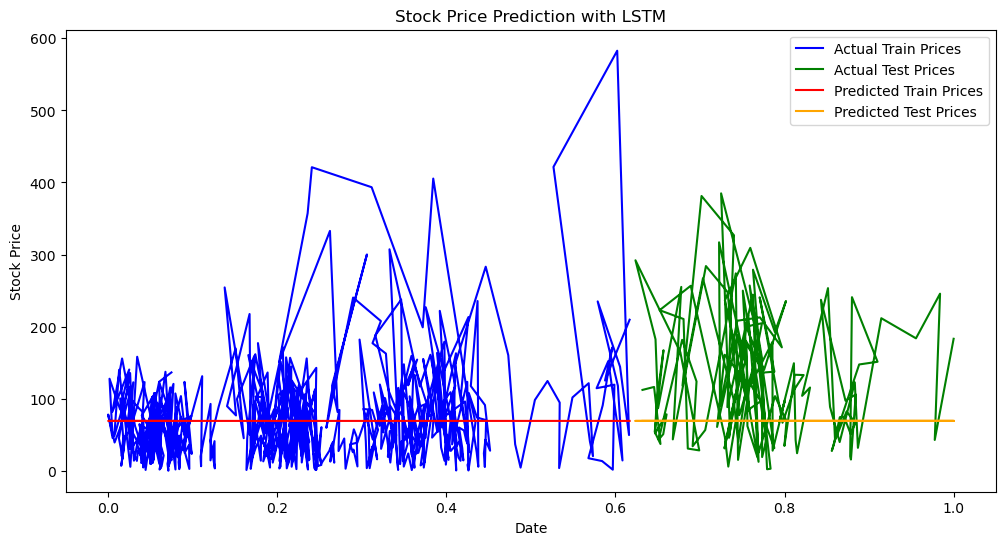

In [102]:
stock_data=data1
# Step 12: Plot the results
plt.figure(figsize=(12, 6))
X_train=X_train.reshape(542)
X_test=X_test.reshape(136)



# Correcting the x-index for train predictions
plt.plot(X_train, y_train_actual, color='blue', label='Actual Train Prices')
plt.plot(X_test, y_test_actual, color='green', label='Actual Test Prices')

# Correcting the x-index for predicted values
plt.plot(X_train, train_predictions, color='red', label='Predicted Train Prices')
plt.plot(X_test, test_predictions, color='orange', label='Predicted Test Prices')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()



In [109]:
a=np.sum((test_predictions-y_test_actual)**2)

In [110]:
b=np.sum((y_test_actual-rf-gamma_m*X_test)**2)

In [111]:
a/b

0.0034031323805153385

array([[111.95796519],
       [116.05054054],
       [ 37.06130166],
       [ 53.93269492],
       [166.96303574],
       [ 96.40900605],
       [ 51.71141505],
       [ 78.16594687],
       [ 50.68778377],
       [ 43.05100697],
       [181.33823102],
       [123.66245771],
       [ 33.89194424],
       [ 56.37771135],
       [273.40509066],
       [ 15.02398253],
       [110.60969656],
       [204.32362769],
       [199.73093534],
       [139.58431111],
       [235.09593373],
       [192.26915076],
       [278.446231  ],
       [ 66.71053796],
       [ 31.22172893],
       [187.75152471],
       [384.23998611],
       [ 70.32834337],
       [150.8657027 ],
       [316.40637841],
       [ 89.59600872],
       [207.79325028],
       [212.40933991],
       [170.93082556],
       [308.71939494],
       [236.19463131],
       [107.44033914],
       [ 40.70542901],
       [ 99.90348826],
       [266.46682036],
       [117.92232345],
       [380.59537131],
       [326.11527737],
       [ 88